# Classification Using Decision Trees

**Author:** Manaranjan Pradhan</br>
**Email ID:** manaranjan@gmail.com</br>
**LinkedIn:** https://www.linkedin.com/in/manaranjanpradhan/</br>
**Website:** www.manaranjanp.com


## 1. HR - Attrition Analytics

Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources. So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the impact to the orgranization.

## 2. Data Set

This dataset is taken from kaggle https://www.kaggle.com/datasets/jacksonchou/hr-data-for-analytics


### 2.1 Dependent variable

Left : 0 if employee did not leave , 1 if left company

### 2.2 Independent variables

- **satisfaction_level** : means how much employee satisfied (0 less satisfied , 1 most satisfied)
- **last_evaluation** : means employees' evaluation for last month (0 bad , 1 Excellent)
- **number_project** : number of projects the employee worked on
- **average_montly_hours** : average months employee spends at work per month
- **time_spend_company** : years the employee spent in a company
- **Work_accident** : 0 if he did not have an accident , 1 if had at least one
- **promotion_last_5years** : 0 if he did not have any promotion in last 5 years , 1 if had at least one
- **dept** : department in which employee works
- **salary** : High, medium or low bracket

## 3. Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

sn.set_palette("tab10")

In [2]:
hr_df = pd.read_csv('HR_comma_sep.csv')

In [3]:
hr_df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
9783,0.63,0.78,2,158,5,1,0,0,sales,medium
10457,0.52,0.98,4,165,2,0,0,0,sales,low
1617,0.76,0.98,4,237,5,0,1,0,sales,low
4658,0.68,0.67,4,135,2,0,0,0,accounting,medium
4736,0.83,0.91,3,168,3,0,0,1,technical,medium
6641,0.98,0.38,4,140,6,0,0,0,accounting,medium
5588,0.49,0.89,2,233,4,1,0,0,sales,medium
10225,0.73,0.89,3,139,3,0,0,0,RandD,medium
6714,0.19,0.69,4,269,6,0,0,0,RandD,medium
9047,0.77,0.79,3,273,2,0,0,0,technical,medium


In [4]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## 4. EDA

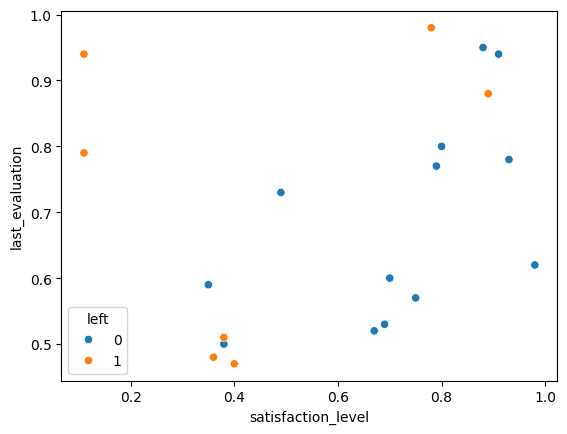

In [5]:
sn.scatterplot(data = hr_df.sample(20, random_state = 48),
               x = 'satisfaction_level',
               y = 'last_evaluation',
               hue = 'left');

## 5. Finding Decision Rules or Boundaries

- Decision rules or boundaries in decision trees are determined based on the feature values and their corresponding thresholds to create partitions that maximize the separation of different classes.

- Decision trees make splits in the data based on features that provide the most information gain or reduction in impurity.

- Impurity estimation is a concept used in decision tree classification models to measure the homogeneity or impurity of a set.

There are several impurity estimation metrics commonly used in decision tree algorithms, including:

- Gini impurity: It measures the probability of misclassifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution at that node. A lower Gini impurity indicates a more homogeneous node.

$$Gini(p) = 1 - \sum_{i=1}^{c} p_i^2$$

- Entropy: It calculates the level of disorder or uncertainty in a set of samples. Entropy is maximum when all class labels are equally probable and decreases as the distribution becomes more skewed. The goal is to minimize entropy at each node.

$$Entropy(p) = -p \log_2(p) - (1-p) \log_2(1-p)$$


In [6]:
import math

In [7]:
-0.5*math.log(0.5, 2)

0.5

### 5.1. Total Gini Impurity and Information Gain

- Gini impurity ranges between 0 and 0.5,
- 0.0 represents a perfectly pure node (all samples belong to the same class)
- 0.5 indicates maximum impurity (samples are evenly distributed across different classes).

In [8]:
gini_total = 1 - pow(7/20, 2) - pow(13/20, 2)
gini_total

0.455

#### If decision rule is satisfaction_level < 0.2

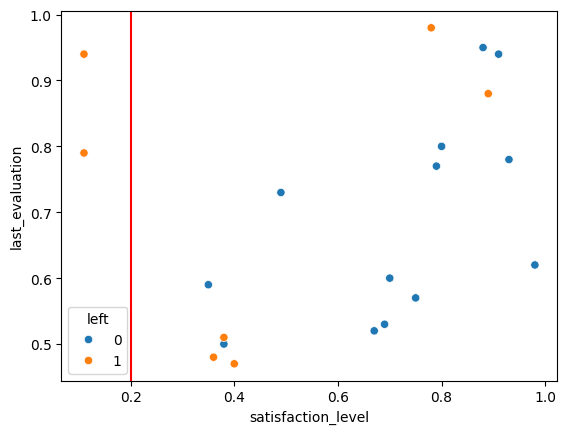

In [9]:
sn.scatterplot(data = hr_df.sample(20, random_state = 48),
               x = 'satisfaction_level',
               y = 'last_evaluation',
               hue = 'left');
plt.axvline(x = 0.2, color = 'r', label = 'cut off');

In [10]:
gini_1 = 1 - pow(2/2, 2) - pow(0/2, 2)
gini_1

0.0

In [11]:
gini_2 = 1 - pow(5/18, 2) - pow(13/18, 2)
gini_2

0.4012345679012346

### 5.2. Information gain

- Information gain is a concept used in decision trees to measure the reduction in entropy or impurity achieved by splitting the data based on a specific attribute.

- Information gain is calculated by comparing the entropy of the parent node (before the split) with the weighted average entropy of the child nodes (after the split).

Let's computer impurity after the split is:

$$Gini_{childnodes} = [Gini_{leftchild} * P(left_{child}) + Gini_{rightchild} * P(right_{child})]$$

So, the reduction in impurity i.e. information gain is

$$Information Gain = Gini_{parent} - Gini_{childnodes}$$



In [12]:
gini_childnodes = ((2/20)*gini_1 + (18/20)*gini_2)
gini_childnodes

0.3611111111111111

In [13]:
information_gain = gini_total - gini_childnodes
round(information_gain, 2)

0.09

#### If decision rule is satisfaction_level < 0.45

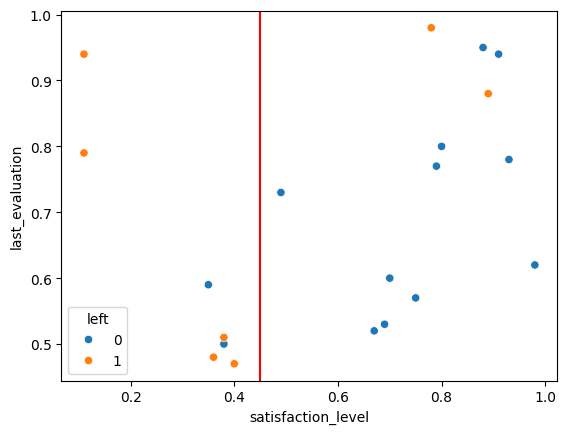

In [14]:
sn.scatterplot(data = hr_df.sample(20, random_state = 48),
               x = 'satisfaction_level',
               y = 'last_evaluation',
               hue = 'left');
plt.axvline(x = 0.45, color = 'r', label = 'cut off');

In [15]:
gini_1 = 1 - pow(5/7, 2) - pow(2/7, 2)
gini_1

0.40816326530612246

In [16]:
gini_2 = 1 - pow(2/13, 2) - pow(11/13, 2)
gini_2

0.2603550295857988

In [17]:
information_gain = gini_total - ((7/20)*gini_1 + (13/20)*gini_2)
round(information_gain, 2)

0.14

#### Note:

- Decision rule is *satisfaction_level < 0.45* is better than *satisfaction_level < 0.2*

### Ex1: Participant Exercise

1. Find information gains for the following decision rules:
    - last_evaluation is 0.55
    - last_evaluation is 0.85
    
2. Which of the above decision rule or boundary has maximum information gain?    

## 6. Encode Categorical Features

In [18]:
hr_encoded_df = pd.get_dummies(hr_df, columns=['dept', 'salary'])

In [19]:
hr_encoded_df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
5,0.41,0.50,2,153,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
6,0.10,0.77,6,247,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
7,0.92,0.85,5,259,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
8,0.89,1.00,5,224,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
9,0.42,0.53,2,142,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


## 7. Building a Decision Tree


### 7.1. Setting X and y Values

In [20]:
X_features = list(hr_encoded_df.columns)
X_features.remove('left')

In [21]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'dept_IT',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [22]:
X = hr_encoded_df[X_features]
y = hr_encoded_df.left

### 7.2. Split Dataset into train and test

- Train: 80%
- Test: 20%

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, \
y_train, y_test = train_test_split( X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 100 )

In [25]:
X_train.shape

(11999, 20)

In [26]:
X_test.shape

(3000, 20)

### 7.3. Build Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
tree = DecisionTreeClassifier(max_depth=5, criterion='gini')

In [29]:
tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=5)

### 7.4. Predicting on Test Data

In [30]:
y_pred = tree.predict(X_test)

In [31]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred})

In [32]:
y_df.sample(10, random_state=20)

,actual,predicted
310,1,1
14670,1,1
1322,1,1
3314,0,0
11348,0,0
12630,1,1
7293,0,0
13600,0,0
4038,0,0
1499,1,1


### 7.5. Measuring Accuracy

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, y_pred)

0.9753333333333334

### 7.6. Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [36]:
cm = confusion_matrix(y_df.actual, y_df.predicted, labels=[1,0])

In [37]:
cm

array([[ 703,   47],
       [  27, 2223]])

In [38]:
cm_plot = ConfusionMatrixDisplay(cm, display_labels=['Left', 'No Left'])

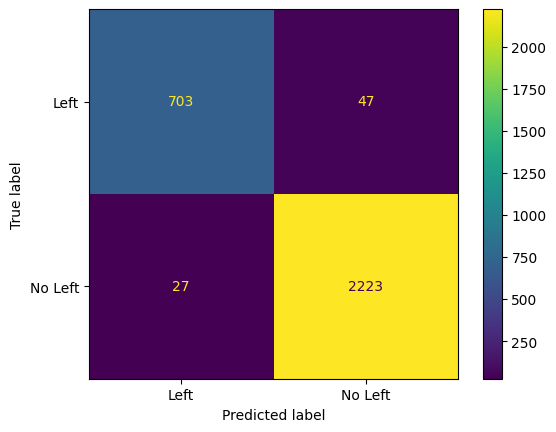

In [39]:
cm_plot.plot();

### 7.7. Finding accuracy metrices

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [41]:
print(classification_report(y_df.actual, y_df.predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2250
           1       0.96      0.94      0.95       750

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



### 7.8. ROC AUC

In [42]:
pred_probs = tree.predict_proba(X_test)
y_df['pred_probs'] = pred_probs[:, 1]

In [43]:
y_df.sample(10)

,actual,predicted,pred_probs
9951,0,0,0.012078
8435,0,0,0.012078
6874,0,0,0.012078
8463,0,0,0.012078
753,1,1,0.977833
3173,0,0,0.027826
5462,0,0,0.012078
887,1,1,0.977833
6464,0,0,0.012078
6330,0,0,0.012078


In [44]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [45]:
roc_auc_score(y_df.actual, y_df.pred_probs)

np.float64(0.9786438518518519)

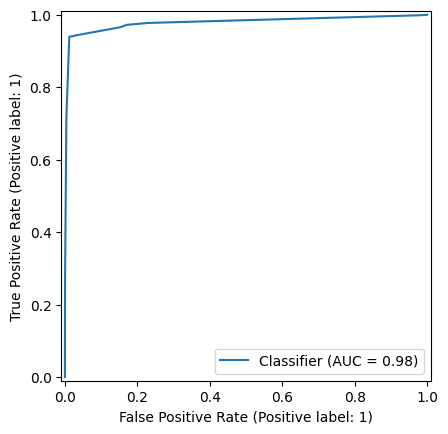

In [46]:
RocCurveDisplay.from_predictions(y_df.actual, y_df.pred_probs);

## 8. Visualize the Decision Tree

One of the benefits of decision tree is the rules can be visualized.

In [47]:
from sklearn.tree import plot_tree

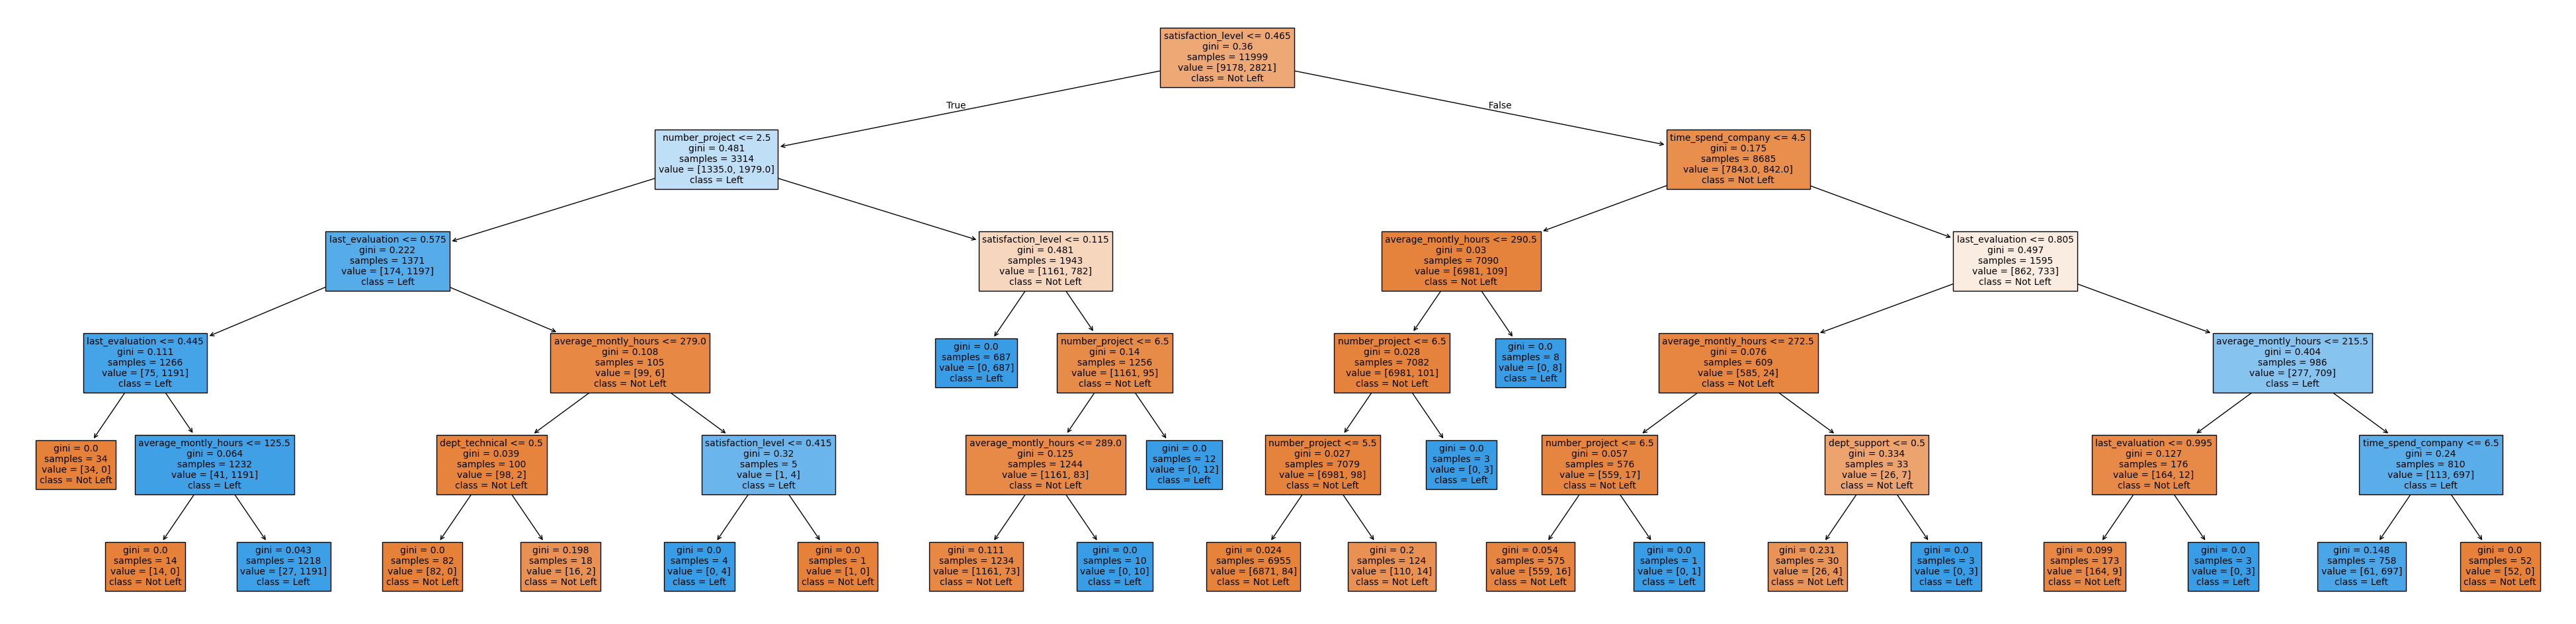

In [48]:
plt.figure(figsize = (50, 12))
plot_tree(tree,
          feature_names = X_features,
          class_names = ['Not Left', 'Left'],
          filled = True,
          fontsize = 10);
plt.savefig('tree.png')

In [49]:
from IPython import display

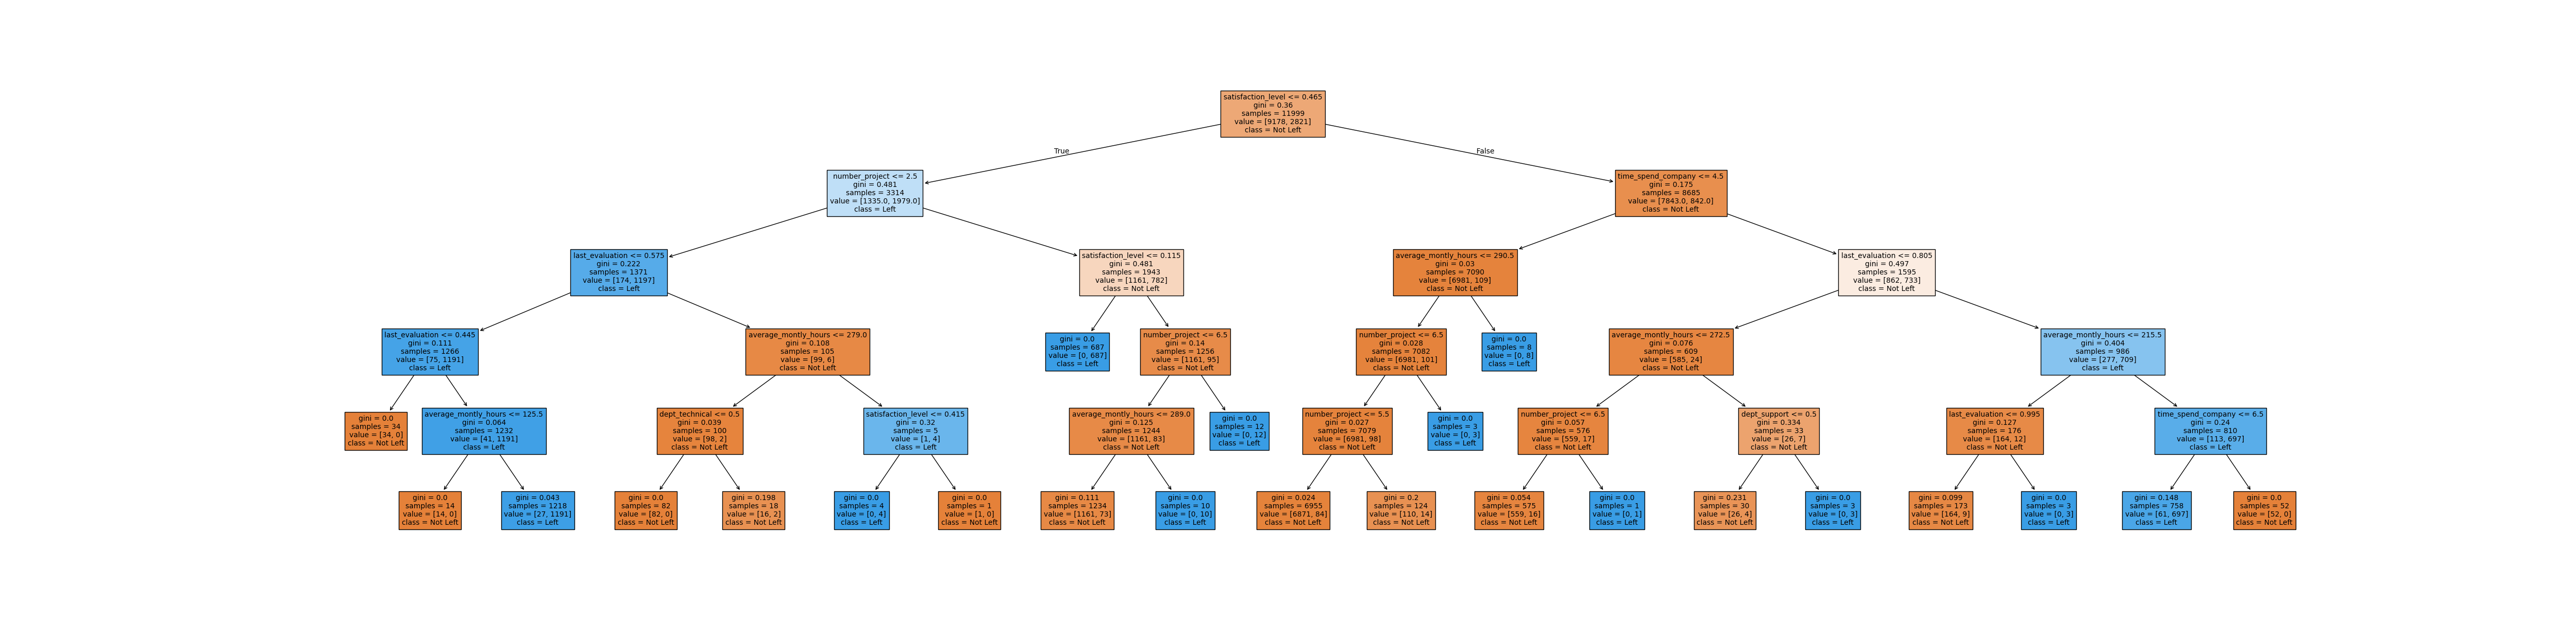

In [50]:
display.Image("tree.png")

## 9. Feature Importance

In [51]:
tree.feature_importances_

array([5.20996959e-01, 1.50478477e-01, 1.02812305e-01, 6.61478332e-02,
       1.58379055e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.08853988e-03,
       9.68306679e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [52]:
importance_df = pd.DataFrame({'feature': X_features,
                              'importance': tree.feature_importances_})

In [53]:
importance_df = importance_df.sort_values('importance', ascending = False)
importance_df

,feature,importance
0,satisfaction_level,0.520997
4,time_spend_company,0.158379
1,last_evaluation,0.150478
2,number_project,0.102812
3,average_montly_hours,0.066148
15,dept_support,0.001089
16,dept_technical,0.000097
5,Work_accident,0.000000
8,dept_RandD,0.000000
9,dept_accounting,0.000000


In [54]:
importance_df['cummulative_imp'] = importance_df.importance.cumsum()
importance_df

,feature,importance,cummulative_imp
0,satisfaction_level,0.520997,0.520997
4,time_spend_company,0.158379,0.679376
1,last_evaluation,0.150478,0.829854
2,number_project,0.102812,0.932667
3,average_montly_hours,0.066148,0.998815
15,dept_support,0.001089,0.999903
16,dept_technical,0.000097,1.000000
5,Work_accident,0.000000,1.000000
8,dept_RandD,0.000000,1.000000
9,dept_accounting,0.000000,1.000000


### Ex2: Participant Exercise

1. Build decision trees for the following combination of hyper paramters and measure Roc AUC of the models.
    - max_depth is 10 and criteria is gini
    - max_depth is 5 and criteria is entropy
    

### Ex3: Participant Exercise

1. Build decision trees with the top 5 features based on feature importane found in step 9 and measure model performace using Roc AUC and Confusion Matrix.

## 10. Benefits of Decision Trees

Decision trees offer several benefits over other machine learning models, including:

- Interpretable and Easy to Understand: Decision trees provide a transparent and intuitive representation of the decision-making process. The tree structure, along with the decision rules at each node, can be easily visualized and interpreted, making it easier to explain the model's predictions to stakeholders.

- Handling Nonlinear Relationships: Decision trees can effectively capture nonlinear relationships between features and the target variable. They can learn complex decision boundaries without requiring explicit transformations or interactions between variables.

- Feature Importance: Decision trees can provide insights into feature importance. By examining how frequently and at which points features are used for splitting, decision trees can rank the features based on their predictive power, enabling feature selection and dimensionality reduction.